In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Import time series

In [3]:
import pickle
with open('./data/melted_zip8.pickle', 'rb') as file:
    melted_zip8 = pickle.load(file)
    

# ARIMA Modeling

In [4]:
melted_zip8.head()

,value
time,
1996-04-01,65600.0
1996-05-01,65500.0
1996-06-01,65400.0
1996-07-01,65300.0
1996-08-01,65200.0


In [5]:
ts1 = melted_zip8['2010-01-01':]
ts1

,value
time,
2010-01-01,79300.0
2010-02-01,79300.0
2010-03-01,79600.0
2010-04-01,80000.0
2010-05-01,80100.0
...,...
2017-12-01,100500.0
2018-01-01,103900.0
2018-02-01,105600.0


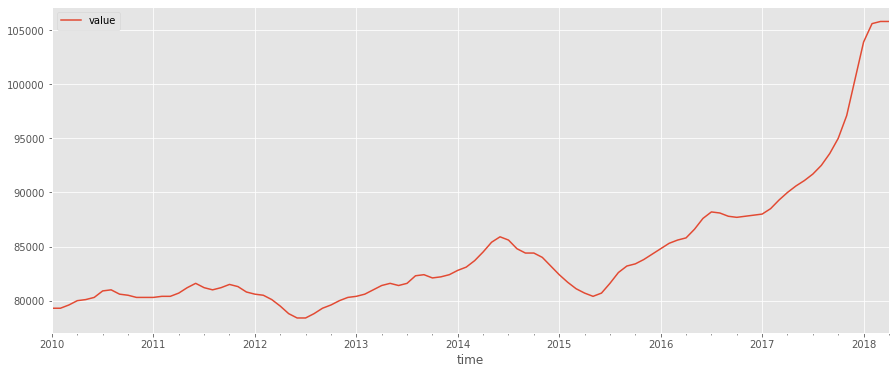

              value
time               
2010-01-01  79300.0
2010-02-01  79300.0
2010-03-01  79600.0
2010-04-01  80000.0
2010-05-01  80100.0


In [6]:
#ts1 = melted_zip2['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [10]:
warnings.filterwarnings('ignore')
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [11]:
warnings.filterwarnings('ignore')
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =2529.4851818094794
ARIMA (0, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =2435.718962151418
ARIMA (0, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =2396.355746445649
ARIMA (0, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1573.7012944122944
ARIMA (0, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1462.9765600506482
ARIMA (0, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1393.3712268658212
ARIMA (0, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1445.6163798106918
ARIMA (0, 0, 0) x (0, 2, 1, 1)12 : AIC Calculated =1400.92440019089
ARIMA (0, 0, 0) x (0, 2, 2, 1)12 : AIC Calculated =1387.3469682962784
ARIMA (0, 0, 0) x (1, 0, 0, 1)12 : AIC Calculated =1573.7279392675675
ARIMA (0, 0, 0) x (1, 0, 1, 1)12 : AIC Calculated =1466.5306324139094
ARIMA (0, 0, 0) x (1, 0, 2, 1)12 : AIC Calculated =1402.2432930494112
ARIMA (0, 0, 0) x (1, 1, 0, 1)12 : AIC Calculated =1454.0280980239686
ARIMA (0, 0, 0) x (1, 1, 1, 1)12 : AIC Calculated =1405.506834724288
ARIMA (0, 0, 0) x (1, 1, 

ARIMA (0, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1358.780609173635
ARIMA (0, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1340.0309916540004
ARIMA (0, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1369.677372908351
ARIMA (0, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1366.7805082996645
ARIMA (0, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1334.2662004959323
ARIMA (0, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1392.0838958914412
ARIMA (0, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1351.6111370420977
ARIMA (0, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1349.2407460010616
ARIMA (1, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1573.7279392675675
ARIMA (1, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =1500.2176613696754
ARIMA (1, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =1404.2455694737378
ARIMA (1, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1454.0280980239686
ARIMA (1, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1405.872510197952
ARIMA (1, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1386.8858808810091
ARIMA (1, 0, 0) x (0, 2

ARIMA (1, 2, 2) x (1, 0, 2, 1)12 : AIC Calculated =1353.9179699182039
ARIMA (1, 2, 2) x (1, 1, 0, 1)12 : AIC Calculated =1383.1338140078358
ARIMA (1, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1359.4534259671498
ARIMA (1, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1336.2794782546862
ARIMA (1, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1444.3587157604973
ARIMA (1, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1358.8027759210474
ARIMA (1, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1348.5327715286687
ARIMA (1, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1370.738281368488
ARIMA (1, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1360.7169952378306
ARIMA (1, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1344.7915686598687
ARIMA (1, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1364.7960404155938
ARIMA (1, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1350.2367801210717
ARIMA (1, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1332.4276983407512
ARIMA (1, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1406.3701609391178
ARIMA (1, 2, 2) x (2,

ARIMA (2, 1, 0) x (2, 1, 0, 1)12 : AIC Calculated =1361.3711948891837
ARIMA (2, 1, 0) x (2, 1, 1, 1)12 : AIC Calculated =1356.1648652842582
ARIMA (2, 1, 0) x (2, 1, 2, 1)12 : AIC Calculated =1357.8592241903525
ARIMA (2, 1, 0) x (2, 2, 0, 1)12 : AIC Calculated =1378.6804585737823
ARIMA (2, 1, 0) x (2, 2, 1, 1)12 : AIC Calculated =1366.783709303682
ARIMA (2, 1, 0) x (2, 2, 2, 1)12 : AIC Calculated =1368.5000166076675
ARIMA (2, 1, 1) x (0, 0, 0, 1)12 : AIC Calculated =1404.9159411109192
ARIMA (2, 1, 1) x (0, 0, 1, 1)12 : AIC Calculated =1387.614313729749
ARIMA (2, 1, 1) x (0, 0, 2, 1)12 : AIC Calculated =1369.5019920106552
ARIMA (2, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1386.4607392574972
ARIMA (2, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1373.9431565645978
ARIMA (2, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1358.780605621575
ARIMA (2, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1404.8026338949394
ARIMA (2, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1385.2061353817564
ARIMA (2, 1, 1) x (0, 2

ARIMA (2, 2, 2) x (0, 1, 1, 1)12 : AIC Calculated =1366.7830145991288
ARIMA (2, 2, 2) x (0, 1, 2, 1)12 : AIC Calculated =1334.2662003756054
ARIMA (2, 2, 2) x (0, 2, 0, 1)12 : AIC Calculated =1417.555288104184
ARIMA (2, 2, 2) x (0, 2, 1, 1)12 : AIC Calculated =1351.611137049025
ARIMA (2, 2, 2) x (0, 2, 2, 1)12 : AIC Calculated =1341.6641680484638
ARIMA (2, 2, 2) x (1, 0, 0, 1)12 : AIC Calculated =1375.8168453568908
ARIMA (2, 2, 2) x (1, 0, 1, 1)12 : AIC Calculated =1363.2162203406876
ARIMA (2, 2, 2) x (1, 0, 2, 1)12 : AIC Calculated =1341.958498414608
ARIMA (2, 2, 2) x (1, 1, 0, 1)12 : AIC Calculated =1366.8398794149057
ARIMA (2, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1350.249628804889
ARIMA (2, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1335.5319650559827
ARIMA (2, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1406.4326846185343
ARIMA (2, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1344.8576551567785
ARIMA (2, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1343.0422169278932
ARIMA (2, 2, 2) x (2, 0,

In [7]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

NameError: name 'ans' is not defined

In [8]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(1, 1, 2), 
                                        seasonal_order=(2, 2, 2, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1620      0.336      0.483      0.629      -0.496       0.820
ma.L1          0.9985      0.250      4.001      0.000       0.509       1.488
ma.L2          0.4697      0.180      2.604      0.009       0.116       0.823
ar.S.L1        0.2958      0.469      0.630      0.529      -0.624       1.216
ar.S.L2       -0.1320      0.263     -0.502      0.616      -0.647       0.383
ma.S.L1       -2.0805      0.159    -13.087      0.000      -2.392      -1.769
ma.S.L2        1.0796      0.171      6.299      0.000       0.744       1.416
sigma2      7.515e+04   4.25e-06   1.77e+10      0.000    7.52e+04    7.52e+04


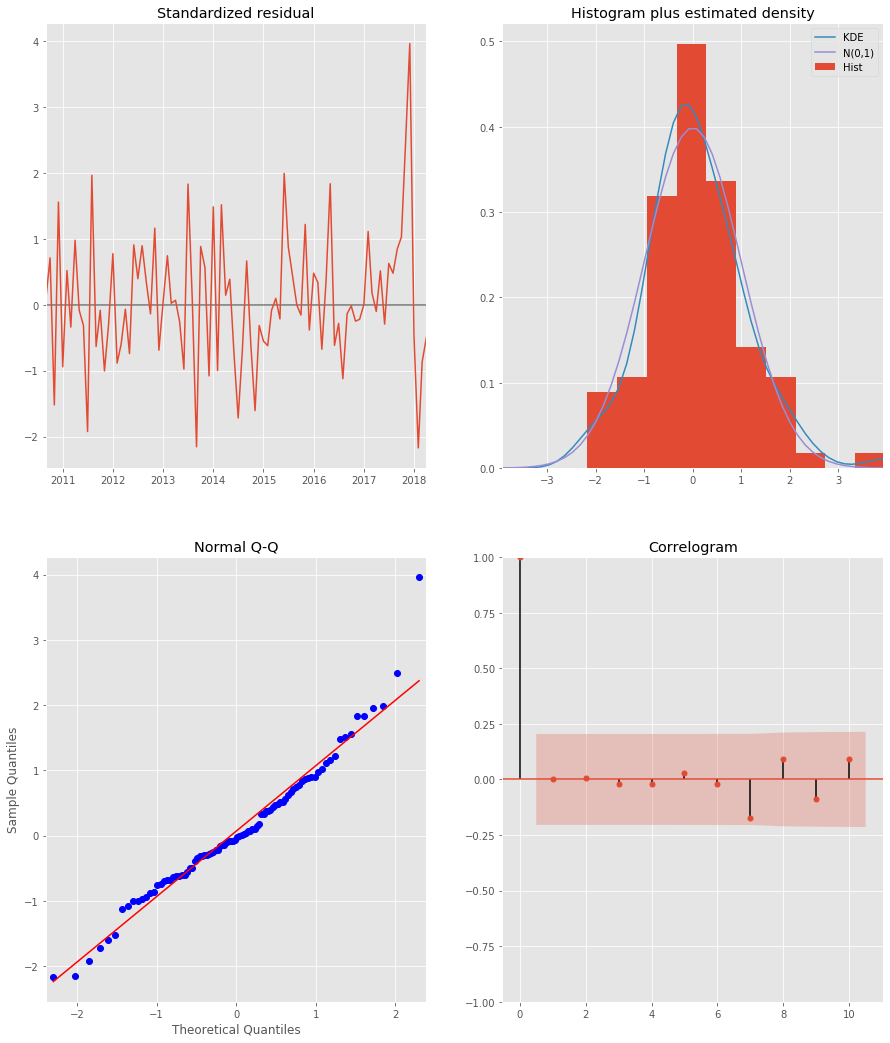

In [14]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [9]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

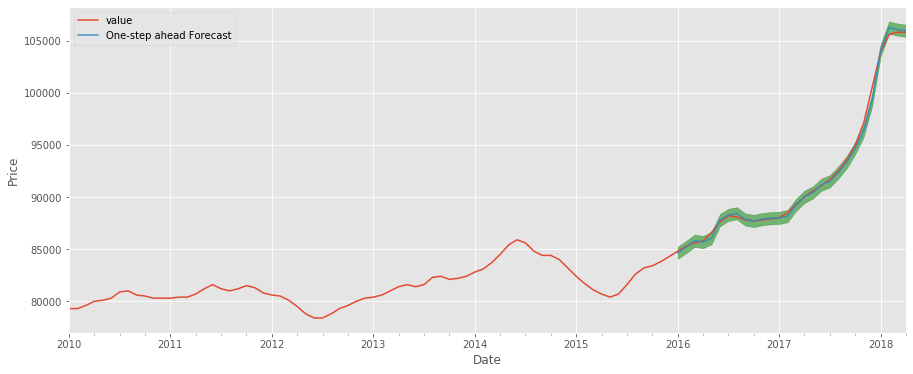

In [10]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [165]:
# pred.predicted_mean

In [11]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 349.33


## Dynamic Forecasting

In [12]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

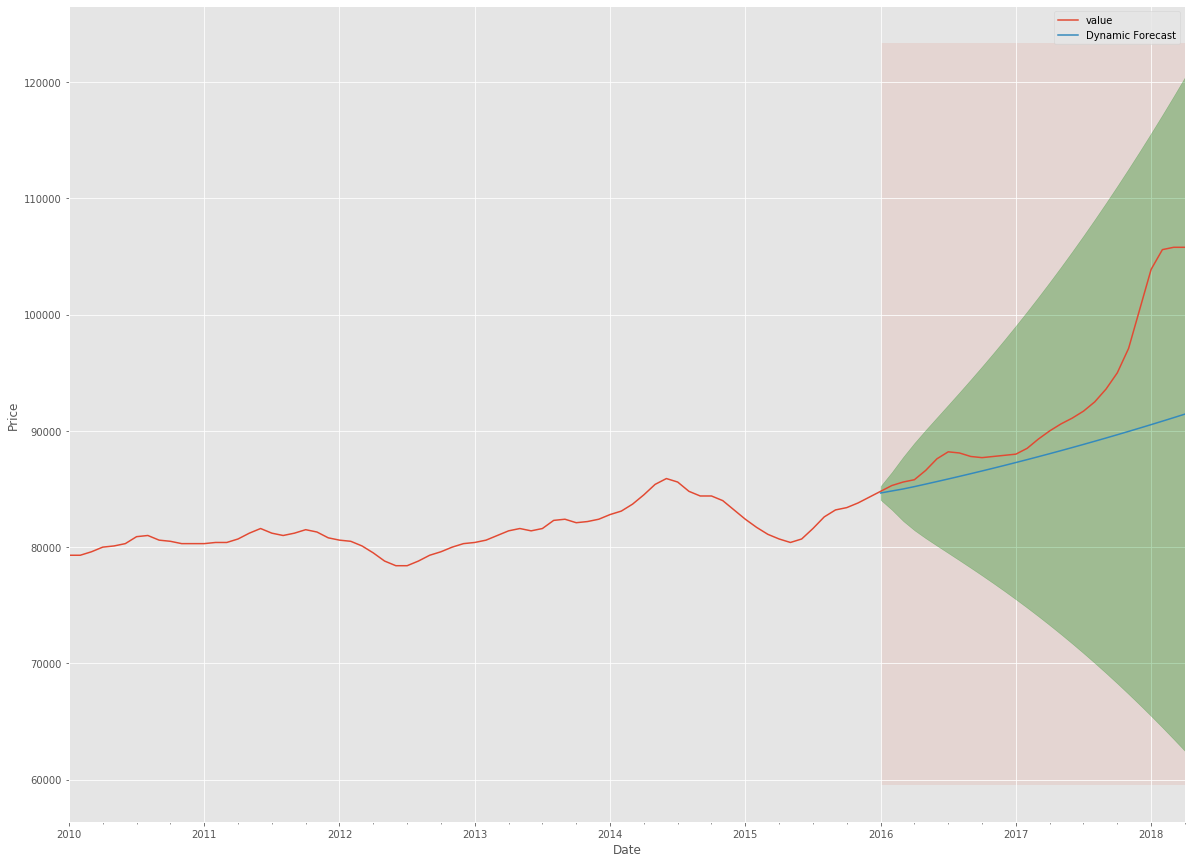

In [13]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [14]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 6209.05


In [45]:
print(mse)

41249183.489025325


## Producing and visualising forecasts

In [15]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

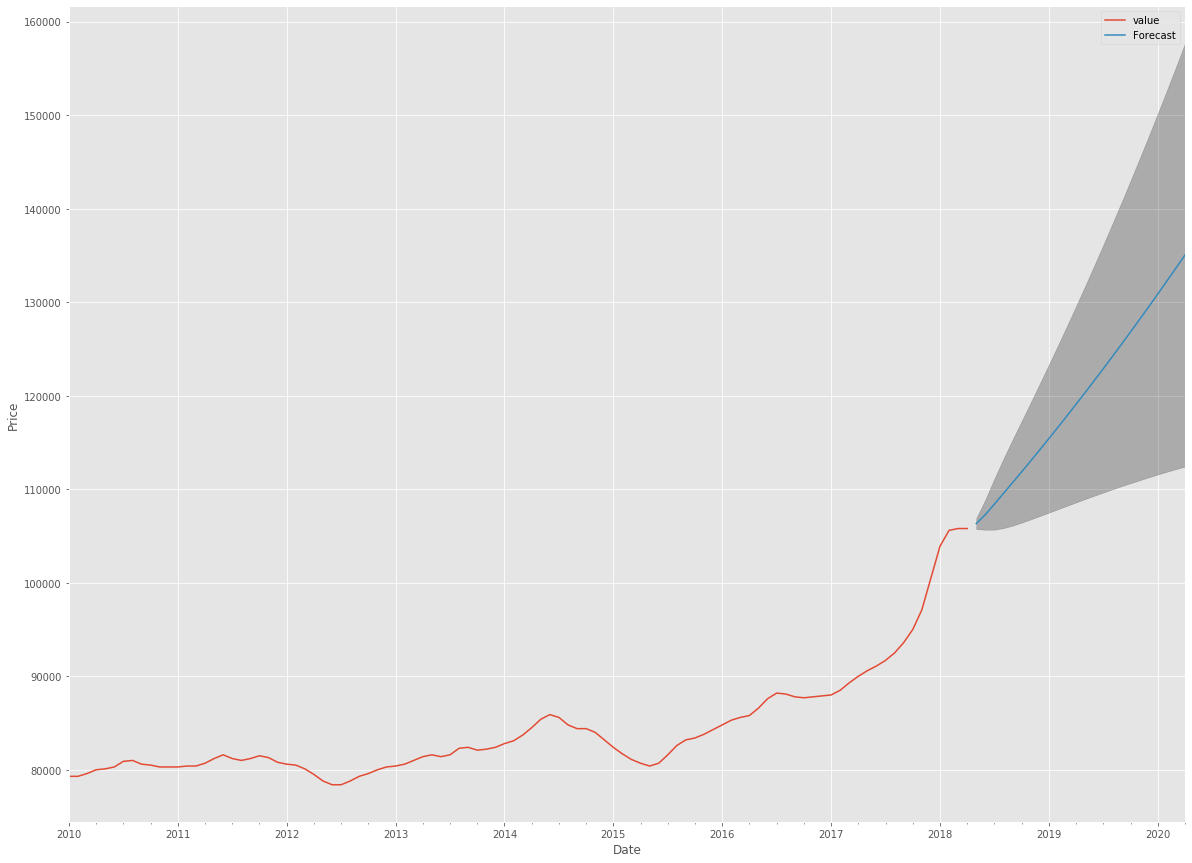

In [16]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [17]:
prediction.predicted_mean['2020-01-01']

130872.32223209356

In [18]:
# ROI
print((prediction.predicted_mean['2020-01-01']/ts1['2018-01'])-1)

               value
time                
2018-01-01  0.259599
